In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_up = pd.read_csv("../data/5_yr_data/UP5_years.csv")
df_up['datetime'] = pd.to_datetime(df_up['date'])
df_up.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
df_up.head()

,district_name,market_name,commodity,variety,grade,min_rs_quintal,max_rs_quintal,modal_rs_quintal,date,year,month,day_of_month,datetime
0,Auraiya,Achalda,Potato,Badshah,FAQ,600.0,700.0,670.0,04 Oct 2019,2019,Oct,4,2019-10-04
1,Auraiya,Achalda,Potato,Badshah,FAQ,780.0,820.0,800.0,05 Dec 2019,2019,Dec,5,2019-12-05
2,Auraiya,Achalda,Potato,Badshah,FAQ,850.0,920.0,900.0,17 Dec 2019,2019,Dec,17,2019-12-17
3,Auraiya,Achalda,Potato,Badshah,FAQ,890.0,950.0,900.0,18 Oct 2019,2019,Oct,18,2019-10-18
4,Auraiya,Achalda,Potato,Badshah,FAQ,1000.0,1090.0,1060.0,29 Jan 2020,2020,Jan,29,2020-01-29


In [3]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from pylab import rcParams

def create_seasonal_decompose_plot(df, commodity, column):
    rcParams['figure.figsize'] = 12, 8
    decomposition = sm.tsa.seasonal_decompose(df[column], model='additive')
    fig = decomposition.plot()
    plt.title("Plot of " + commodity + " and " + column)
    plt.show()

def create_STL_plot(df,commodity,column):
    rcParams['figure.figsize'] = 12, 8
    STL_plot = STL(df[column]).fit()
    STL_plot.plot()
    plt.title("Plot of " + commodity + " and " + column)
    plt.show()

0


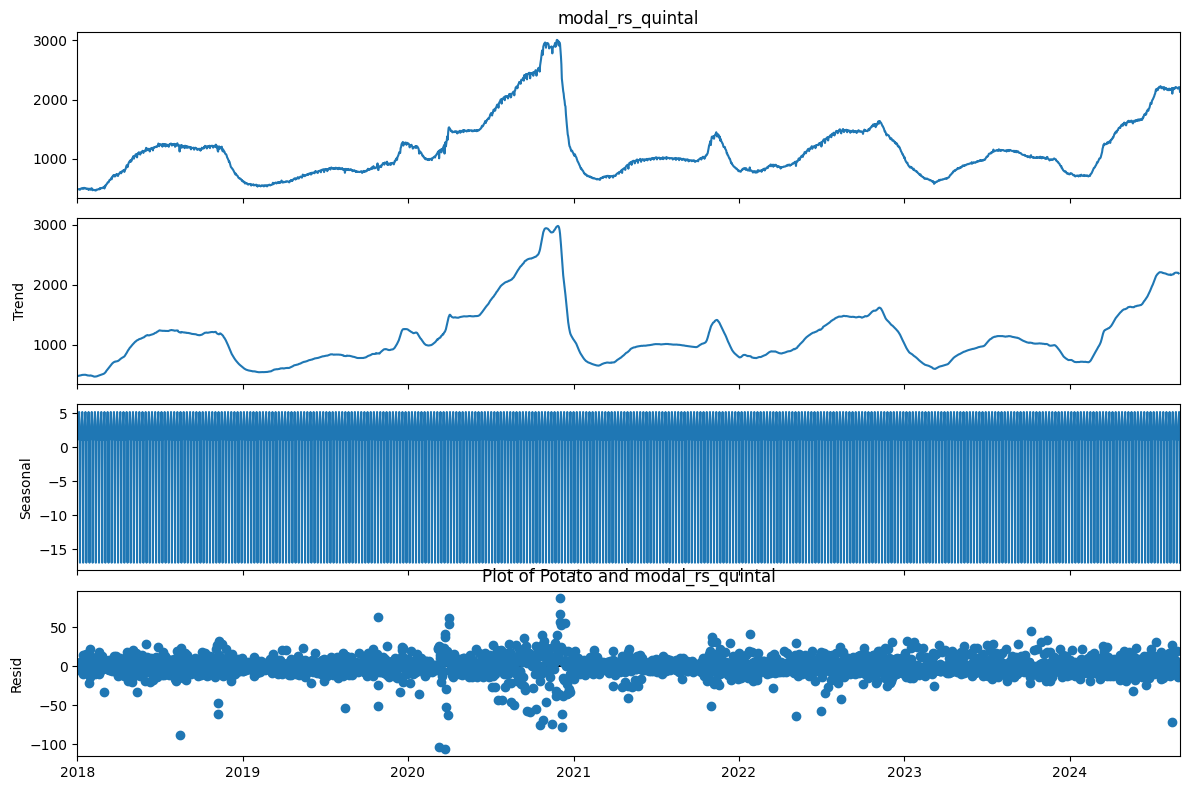

0


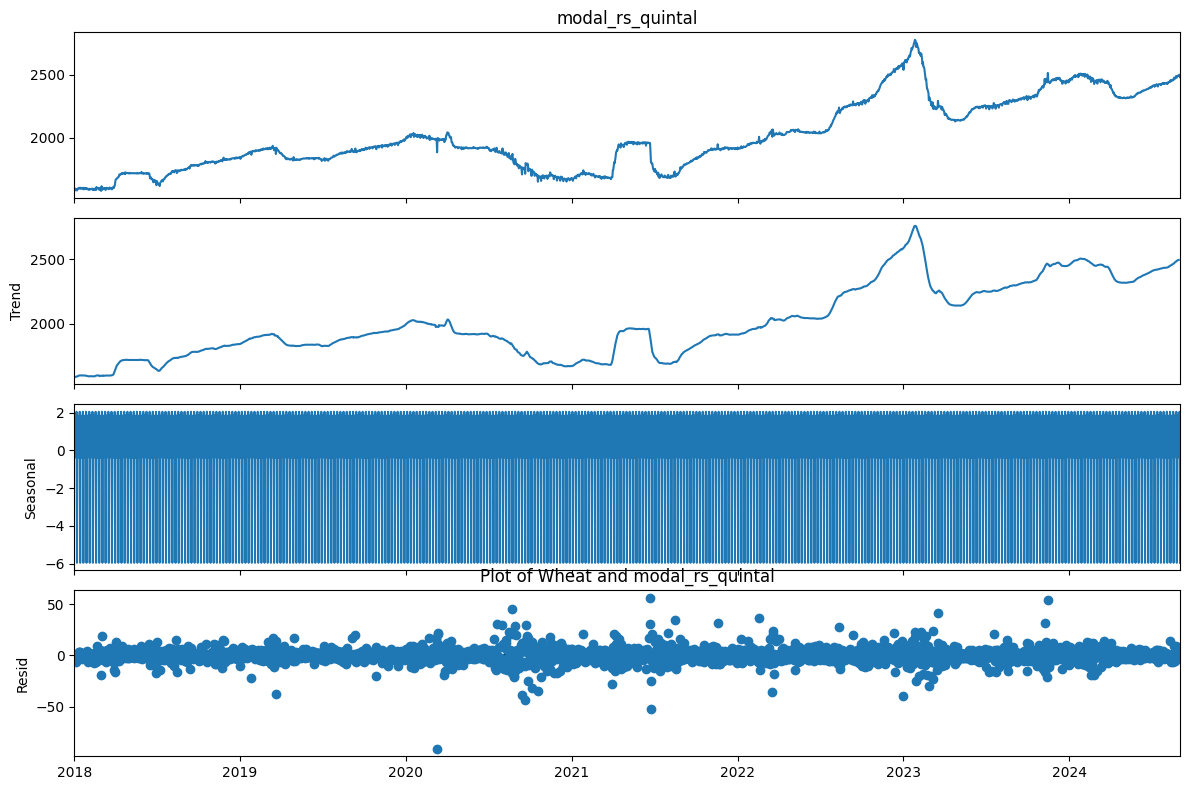

0


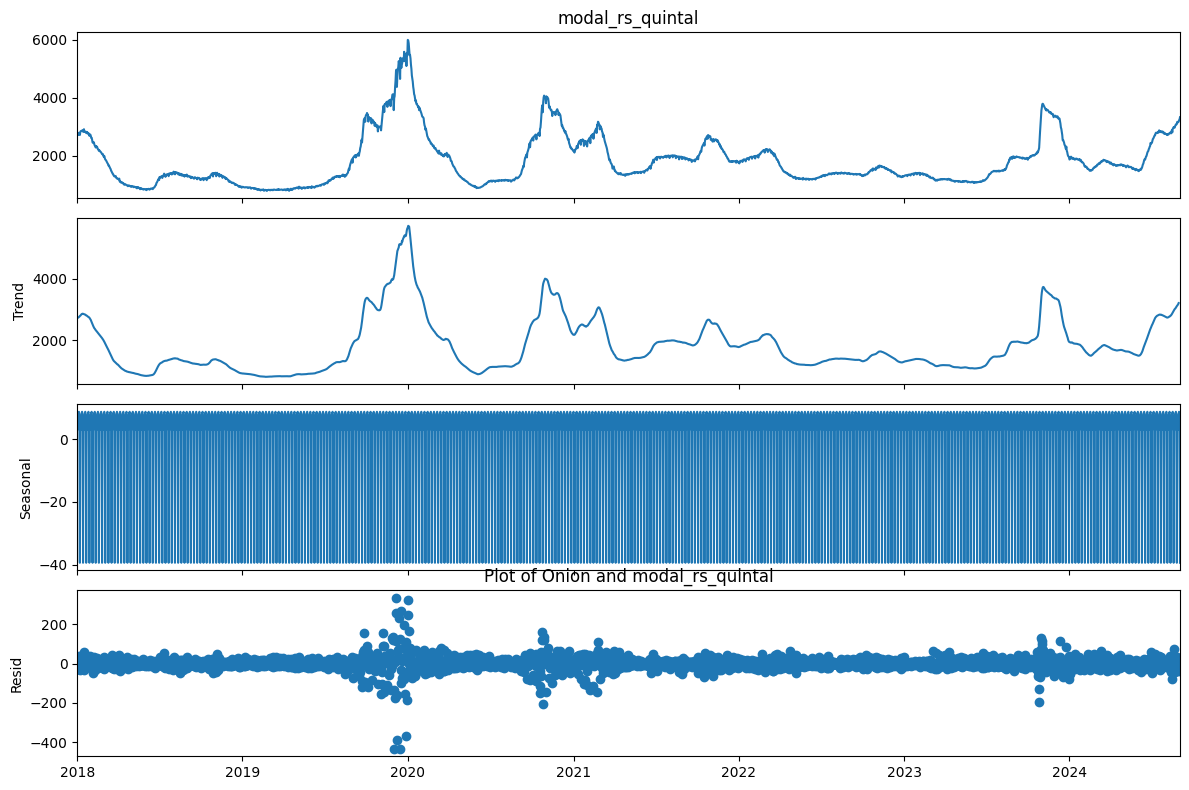

0


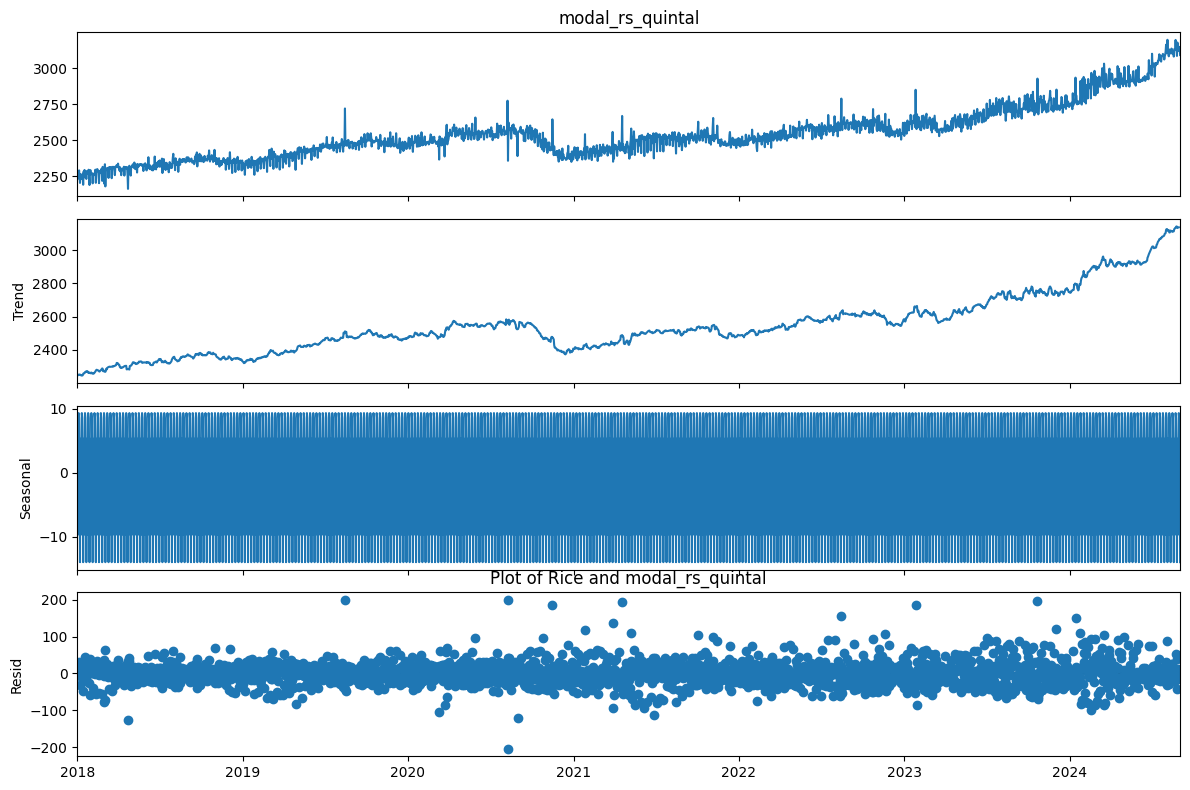

In [4]:
commodities = df_up['commodity'].unique()
for commodity in commodities:
    df_up_commodity = df_up[df_up['commodity'] == commodity]
    df_up_commodity.set_index("datetime", inplace=True)
    df_up_commodity_dt = df_up_commodity.groupby('datetime').agg({"modal_rs_quintal": "mean"})
    duplicates = df_up_commodity_dt.index[df_up_commodity_dt.index.duplicated()]
    print(len(duplicates))
    df_up_commodity_dt = df_up_commodity_dt.asfreq('D')
    create_seasonal_decompose_plot(df_up_commodity_dt, commodity, "modal_rs_quintal")


0


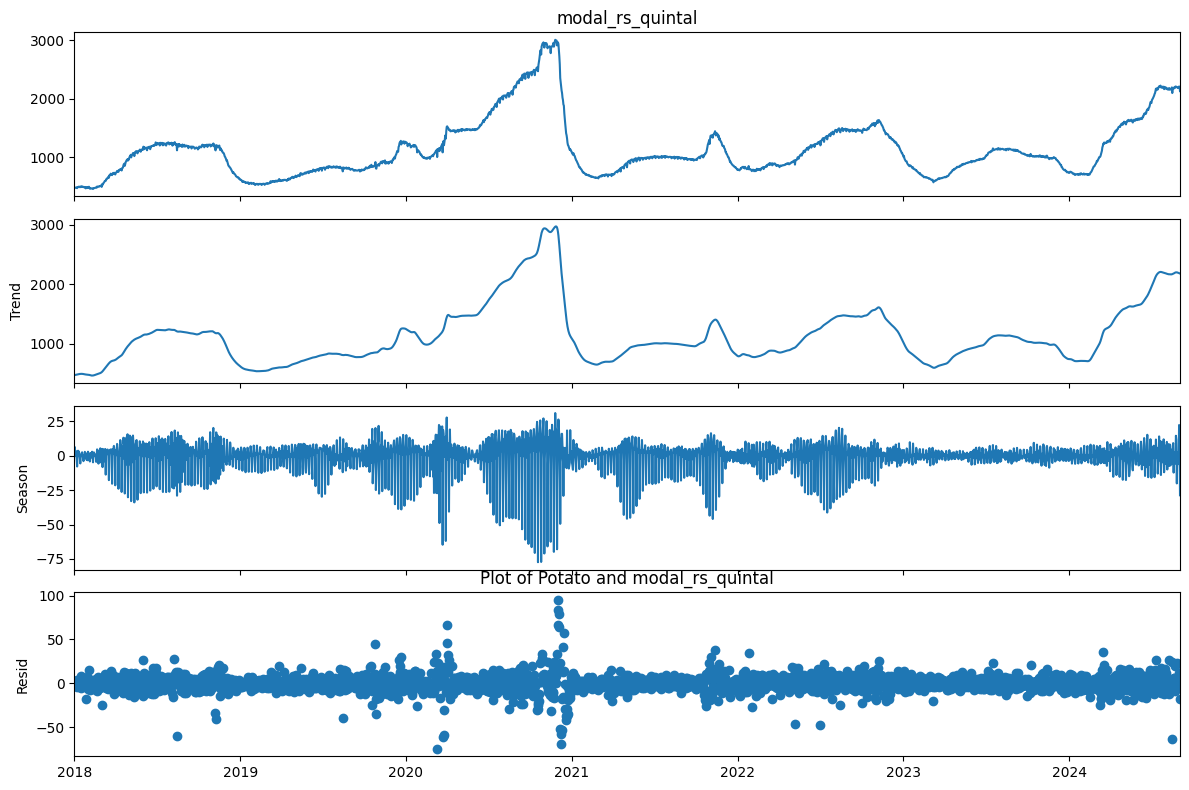

0


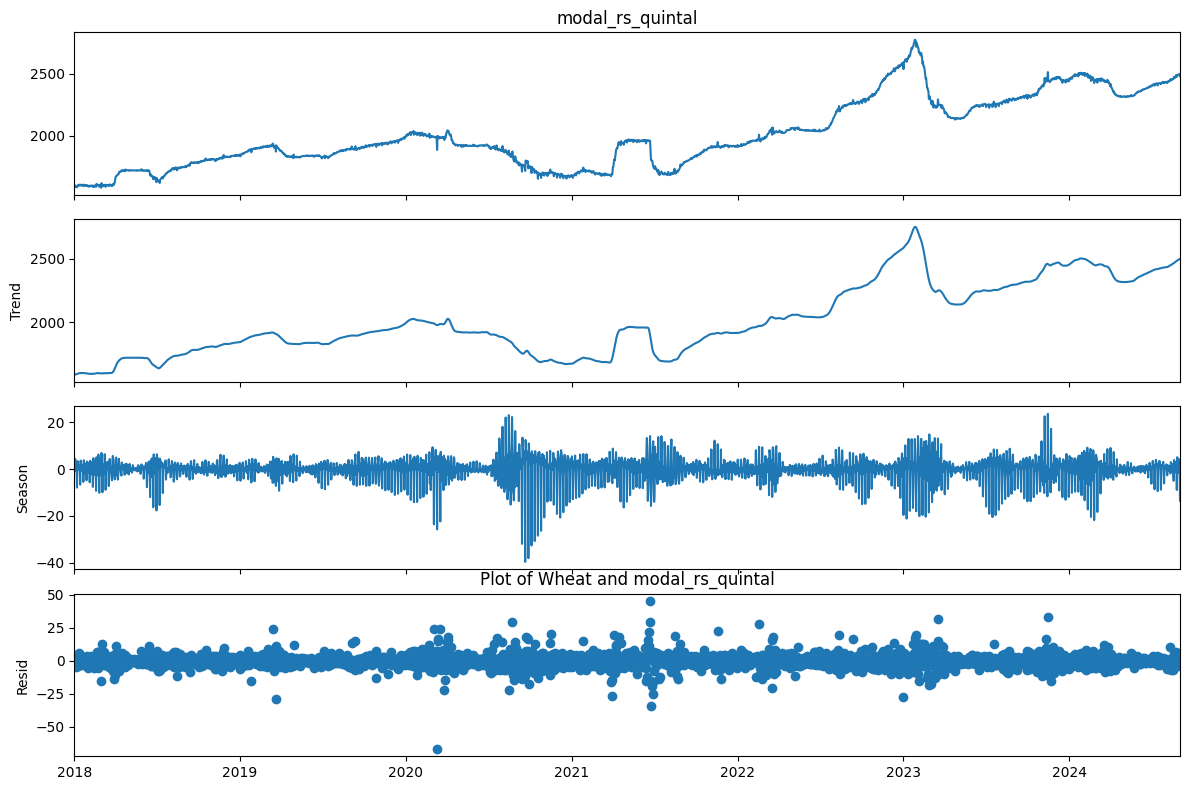

0


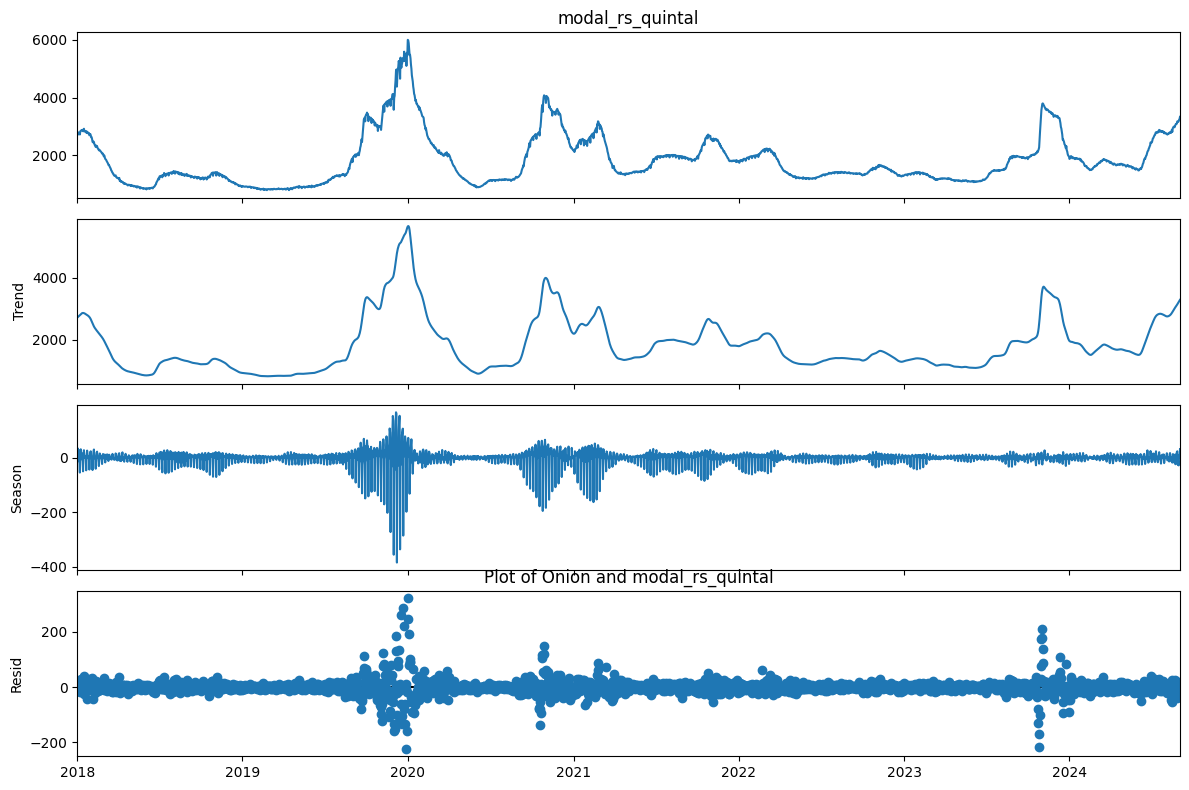

0


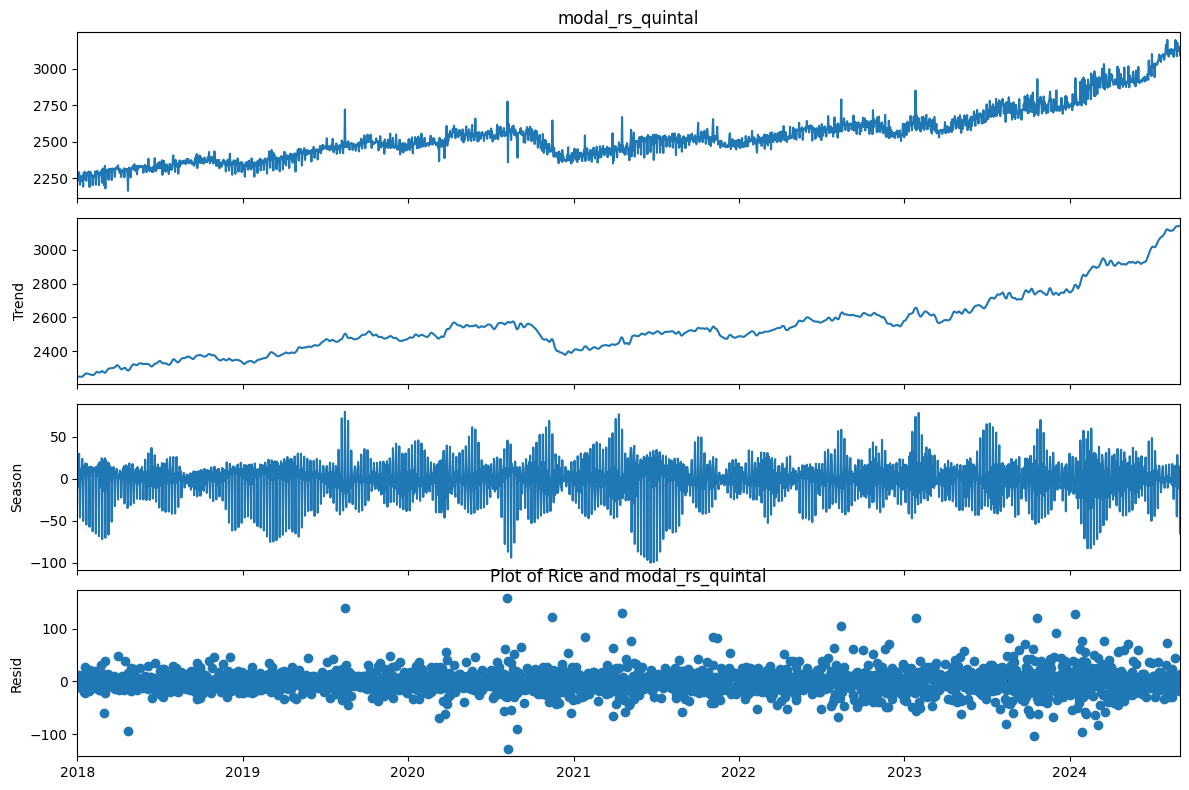

In [5]:
commodities = df_up['commodity'].unique()
for commodity in commodities:
    df_up_commodity = df_up[df_up['commodity'] == commodity]
    df_up_commodity.set_index("datetime", inplace=True)
    df_up_commodity_dt = df_up_commodity.groupby('datetime').agg({"modal_rs_quintal": "mean"})
    duplicates = df_up_commodity_dt.index[df_up_commodity_dt.index.duplicated()]
    print(len(duplicates))
    df_up_commodity_dt = df_up_commodity_dt.asfreq('D')
    create_STL_plot(df_up_commodity_dt, commodity, "modal_rs_quintal")
